In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

from ordered_set import OrderedSet
import itertools
import torch

In [3]:
%matplotlib inline

In [4]:
PREFIX = 'avfp_memory_001'

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

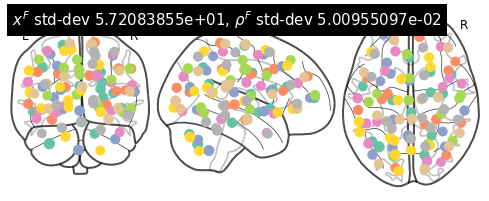

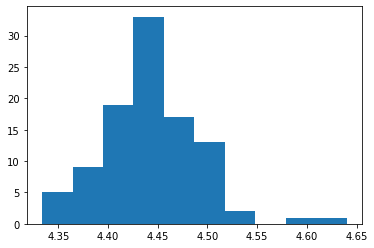

(<nilearn.plotting.displays.OrthoProjector at 0x7f1940d27f10>,
 tensor([[ 22.7167, -53.6097,  23.5313],
         [ 21.3226,  13.3966,  17.6763],
         [-49.5932,  -1.7929,  -6.3694],
         [-32.4893, -65.4800, -40.1911],
         [-18.3203, -16.2608,  63.7130],
         [-39.6857, -59.9281,  40.5782],
         [ 43.5103,  10.5285,  -2.4946],
         [ 15.2515, -74.2273, -29.4934],
         [ 34.8172,  -9.5777,  13.1366],
         [ -0.7767,  28.4325,  20.5837],
         [ 21.7221,  -8.1795,  35.0465],
         [ 24.1767,  57.2205,   8.5469],
         [  1.3096, -29.4180, -17.3938],
         [-15.3207, -87.6291,  19.2803],
         [-23.2916,  -9.6490,  33.4934],
         [ 15.3322, -41.8600,  66.5244],
         [ 27.7300, -36.5380,   0.7989],
         [-54.5692, -26.7300,   1.7023],
         [-29.6226, -15.1070, -14.7421],
         [ 53.6859, -39.9418,  38.8484],
         [ 38.2675, -74.2161,  15.1114],
         [-44.8060,   7.7126,  35.2493],
         [  9.8970,  50.1059,  31.3

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

144

In [10]:
dtfa.num_voxels

175987

In [11]:
dtfa.tasks()

['Heights_b_3.mov',
 'Heights_b_4.mp4',
 'Spiders_b_4.m4v',
 'Spiders_b_1.m4v',
 'Heights_b_2.m4v',
 'Heights_b_1.mp4',
 'Social_b_2.mov',
 'Social_a_2.m4v',
 'Social_a_4.mp4',
 'Social_b_4.mov',
 'Spiders_b_3.mov',
 'Spiders_b_2.mp4',
 'Spiders_a_1.m4v',
 'Social_b_3.mp4',
 'Spiders_a_4.mov',
 'Heights_a_1.mp4',
 'Spiders_a_3.m4v',
 'Heights_a_2.m4v',
 'Heights_a_3.mp4',
 'Social_a_3.mp4',
 'Social_b_1.mp4',
 'Social_a_1.mp4',
 'Heights_a_4.mp4',
 'Spiders_a_2.mp4']

In [12]:
dtfa.subjects()

[150, 158, 159, 161, 166, 169]

In [13]:
losses = dtfa.train(num_steps=500, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=80, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True), l_p=0, l_s=0, l_i=1)

10/20/2021 11:45:39 [Epoch 1] (46336ms) ELBO -3.73737733e+10 = log-likelihood -3.73714072e+10 - KL from prior 2.36347656e+06, P weight penalty 3.01178410e+03, S weight penalty 3.06469115e+03, I weight penalty 2.85890403e+03
10/20/2021 11:45:39 Saving checkpoint...
10/20/2021 11:45:46 [Epoch 2] (6966ms) ELBO -3.63590352e+10 = log-likelihood -3.63567763e+10 - KL from prior 2.25606708e+06, P weight penalty 2.68796840e+03, S weight penalty 2.72572324e+03, I weight penalty 2.65239835e+03
10/20/2021 11:45:53 [Epoch 3] (6765ms) ELBO -3.56853375e+10 = log-likelihood -3.56831591e+10 - KL from prior 2.17544436e+06, P weight penalty 2.30082583e+03, S weight penalty 2.54323590e+03, I weight penalty 2.46137957e+03
10/20/2021 11:46:00 [Epoch 4] (6699ms) ELBO -3.52068879e+10 = log-likelihood -3.52047782e+10 - KL from prior 2.10680848e+06, P weight penalty 1.94896884e+03, S weight penalty 2.38498129e+03, I weight penalty 2.27469680e+03
10/20/2021 11:46:06 [Epoch 5] (6718ms) ELBO -3.48800591e+10 = log-

10/20/2021 11:49:50 [Epoch 38] (6772ms) ELBO -2.87743448e+10 = log-likelihood -2.87736370e+10 - KL from prior 7.07835284e+05, P weight penalty 7.53297363e+02, S weight penalty 8.22981359e+02, I weight penalty 7.10502147e+02
10/20/2021 11:49:57 [Epoch 39] (6836ms) ELBO -2.86988208e+10 = log-likelihood -2.86981222e+10 - KL from prior 6.98590594e+05, P weight penalty 7.84335711e+02, S weight penalty 8.07155726e+02, I weight penalty 7.15161314e+02
10/20/2021 11:50:03 [Epoch 40] (6836ms) ELBO -2.86315531e+10 = log-likelihood -2.86308597e+10 - KL from prior 6.93330912e+05, P weight penalty 7.33679251e+02, S weight penalty 8.63486840e+02, I weight penalty 7.17104881e+02
10/20/2021 11:50:10 [Epoch 41] (6869ms) ELBO -2.85638315e+10 = log-likelihood -2.85631428e+10 - KL from prior 6.88634705e+05, P weight penalty 7.94950788e+02, S weight penalty 8.41333078e+02, I weight penalty 7.21003871e+02
10/20/2021 11:50:17 [Epoch 42] (6867ms) ELBO -2.85028099e+10 = log-likelihood -2.85021238e+10 - KL from 

10/20/2021 11:54:03 [Epoch 75] (6867ms) ELBO -2.74904038e+10 = log-likelihood -2.74895937e+10 - KL from prior 8.09822472e+05, P weight penalty 7.96654640e+02, S weight penalty 1.10032438e+03, I weight penalty 6.67135147e+02
10/20/2021 11:54:10 [Epoch 76] (6774ms) ELBO -2.74785498e+10 = log-likelihood -2.74777374e+10 - KL from prior 8.12365436e+05, P weight penalty 7.92708807e+02, S weight penalty 1.11222215e+03, I weight penalty 6.59937388e+02
10/20/2021 11:54:17 [Epoch 77] (6857ms) ELBO -2.74641006e+10 = log-likelihood -2.74632841e+10 - KL from prior 8.16766329e+05, P weight penalty 8.01885633e+02, S weight penalty 1.11253147e+03, I weight penalty 6.56270570e+02
10/20/2021 11:54:24 [Epoch 78] (6980ms) ELBO -2.74519189e+10 = log-likelihood -2.74510992e+10 - KL from prior 8.19692460e+05, P weight penalty 8.13187875e+02, S weight penalty 1.13043143e+03, I weight penalty 6.49528768e+02
10/20/2021 11:54:30 [Epoch 79] (6746ms) ELBO -2.74341562e+10 = log-likelihood -2.74333331e+10 - KL from 

10/20/2021 11:58:18 [Epoch 112] (6777ms) ELBO -2.71196811e+10 = log-likelihood -2.71187655e+10 - KL from prior 9.15579265e+05, P weight penalty 8.77632523e+02, S weight penalty 1.36762354e+03, I weight penalty 4.32025664e+02
10/20/2021 11:58:25 [Epoch 113] (6788ms) ELBO -2.71080992e+10 = log-likelihood -2.71071804e+10 - KL from prior 9.18665001e+05, P weight penalty 8.84540031e+02, S weight penalty 1.41054745e+03, I weight penalty 4.26104928e+02
10/20/2021 11:58:31 [Epoch 114] (6779ms) ELBO -2.71057085e+10 = log-likelihood -2.71047890e+10 - KL from prior 9.19571063e+05, P weight penalty 8.88421255e+02, S weight penalty 1.44099503e+03, I weight penalty 4.17942411e+02
10/20/2021 11:58:38 [Epoch 115] (6775ms) ELBO -2.70919826e+10 = log-likelihood -2.70910596e+10 - KL from prior 9.22958392e+05, P weight penalty 8.49022273e+02, S weight penalty 1.34606754e+03, I weight penalty 4.10585467e+02
10/20/2021 11:58:45 [Epoch 116] (6755ms) ELBO -2.70881617e+10 = log-likelihood -2.70872371e+10 - KL 

10/20/2021 12:02:35 [Epoch 149] (6760ms) ELBO -2.69321282e+10 = log-likelihood -2.69311344e+10 - KL from prior 9.93708707e+05, P weight penalty 9.41052433e+02, S weight penalty 1.53702640e+03, I weight penalty 2.41445716e+02
10/20/2021 12:02:41 [Epoch 150] (6769ms) ELBO -2.69323478e+10 = log-likelihood -2.69313538e+10 - KL from prior 9.94120770e+05, P weight penalty 9.46647835e+02, S weight penalty 1.52673273e+03, I weight penalty 2.36856399e+02
10/20/2021 12:02:48 [Epoch 151] (6752ms) ELBO -2.69245674e+10 = log-likelihood -2.69235708e+10 - KL from prior 9.96598263e+05, P weight penalty 9.55741012e+02, S weight penalty 1.54303510e+03, I weight penalty 2.34451110e+02
10/20/2021 12:02:55 [Epoch 152] (6720ms) ELBO -2.69268715e+10 = log-likelihood -2.69258738e+10 - KL from prior 9.97765779e+05, P weight penalty 9.51498417e+02, S weight penalty 1.53828518e+03, I weight penalty 2.29581051e+02
10/20/2021 12:03:02 [Epoch 153] (6774ms) ELBO -2.69192350e+10 = log-likelihood -2.69182346e+10 - KL 

10/20/2021 12:06:47 [Epoch 186] (6806ms) ELBO -2.68315073e+10 = log-likelihood -2.68304538e+10 - KL from prior 1.05338819e+06, P weight penalty 1.09952142e+03, S weight penalty 1.63602523e+03, I weight penalty 1.35951358e+02
10/20/2021 12:06:54 [Epoch 187] (6977ms) ELBO -2.68268565e+10 = log-likelihood -2.68258022e+10 - KL from prior 1.05416153e+06, P weight penalty 1.07034897e+03, S weight penalty 1.62334041e+03, I weight penalty 1.33897716e+02
10/20/2021 12:07:01 [Epoch 188] (7004ms) ELBO -2.68262250e+10 = log-likelihood -2.68251686e+10 - KL from prior 1.05652365e+06, P weight penalty 1.07470921e+03, S weight penalty 1.60712209e+03, I weight penalty 1.32378717e+02
10/20/2021 12:07:08 [Epoch 189] (7059ms) ELBO -2.68225864e+10 = log-likelihood -2.68215288e+10 - KL from prior 1.05754908e+06, P weight penalty 1.09197615e+03, S weight penalty 1.58149768e+03, I weight penalty 1.29590303e+02
10/20/2021 12:07:16 [Epoch 190] (7065ms) ELBO -2.68219722e+10 = log-likelihood -2.68209126e+10 - KL 

10/20/2021 12:11:04 [Epoch 223] (7092ms) ELBO -2.67600917e+10 = log-likelihood -2.67589889e+10 - KL from prior 1.10304899e+06, P weight penalty 1.17046718e+03, S weight penalty 1.64153742e+03, I weight penalty 8.69745161e+01
10/20/2021 12:11:11 [Epoch 224] (7100ms) ELBO -2.67639418e+10 = log-likelihood -2.67628380e+10 - KL from prior 1.10402521e+06, P weight penalty 1.14809317e+03, S weight penalty 1.63874038e+03, I weight penalty 8.51199214e+01
10/20/2021 12:11:18 [Epoch 225] (7091ms) ELBO -2.67579590e+10 = log-likelihood -2.67568541e+10 - KL from prior 1.10487329e+06, P weight penalty 1.18327420e+03, S weight penalty 1.60646519e+03, I weight penalty 8.35740846e+01
10/20/2021 12:11:25 [Epoch 226] (7094ms) ELBO -2.67612943e+10 = log-likelihood -2.67601876e+10 - KL from prior 1.10670344e+06, P weight penalty 1.18925450e+03, S weight penalty 1.67845512e+03, I weight penalty 8.22194557e+01
10/20/2021 12:11:32 [Epoch 227] (7090ms) ELBO -2.67555694e+10 = log-likelihood -2.67544608e+10 - KL 

10/20/2021 12:15:19 [Epoch 260] (7022ms) ELBO -2.67185333e+10 = log-likelihood -2.67173900e+10 - KL from prior 1.14340495e+06, P weight penalty 1.22075037e+03, S weight penalty 1.69473641e+03, I weight penalty 7.47117649e+01
10/20/2021 12:15:26 [Epoch 261] (7063ms) ELBO -2.67124555e+10 = log-likelihood -2.67113104e+10 - KL from prior 1.14507328e+06, P weight penalty 1.20035062e+03, S weight penalty 1.70263346e+03, I weight penalty 7.54450273e+01
10/20/2021 12:15:33 [Epoch 262] (7031ms) ELBO -2.67153389e+10 = log-likelihood -2.67141931e+10 - KL from prior 1.14582432e+06, P weight penalty 1.23349744e+03, S weight penalty 1.69472495e+03, I weight penalty 7.68576257e+01
10/20/2021 12:15:40 [Epoch 263] (6825ms) ELBO -2.67086762e+10 = log-likelihood -2.67075281e+10 - KL from prior 1.14804724e+06, P weight penalty 1.23699713e+03, S weight penalty 1.71289683e+03, I weight penalty 7.88877619e+01
10/20/2021 12:15:47 [Epoch 264] (7065ms) ELBO -2.67110861e+10 = log-likelihood -2.67099380e+10 - KL 

10/20/2021 12:19:37 [Epoch 297] (7088ms) ELBO -2.66744519e+10 = log-likelihood -2.66732720e+10 - KL from prior 1.17994197e+06, P weight penalty 1.26779801e+03, S weight penalty 1.73796540e+03, I weight penalty 8.22670465e+01
10/20/2021 12:19:44 [Epoch 298] (7094ms) ELBO -2.66779472e+10 = log-likelihood -2.66767669e+10 - KL from prior 1.18032023e+06, P weight penalty 1.25481717e+03, S weight penalty 1.66766221e+03, I weight penalty 8.12901982e+01
10/20/2021 12:19:52 [Epoch 299] (7076ms) ELBO -2.66701759e+10 = log-likelihood -2.66689940e+10 - KL from prior 1.18192543e+06, P weight penalty 1.25101540e+03, S weight penalty 1.70641494e+03, I weight penalty 8.13951793e+01
10/20/2021 12:19:59 [Epoch 300] (7101ms) ELBO -2.66732396e+10 = log-likelihood -2.66720565e+10 - KL from prior 1.18298565e+06, P weight penalty 1.23453812e+03, S weight penalty 1.66572905e+03, I weight penalty 7.88164676e+01
10/20/2021 12:20:06 [Epoch 301] (6838ms) ELBO -2.66664967e+10 = log-likelihood -2.66653132e+10 - KL 

10/20/2021 12:23:52 [Epoch 334] (6918ms) ELBO -2.66421429e+10 = log-likelihood -2.66409324e+10 - KL from prior 1.21057476e+06, P weight penalty 1.25356768e+03, S weight penalty 1.72266693e+03, I weight penalty 8.86274368e+01
10/20/2021 12:23:59 [Epoch 335] (6806ms) ELBO -2.66396387e+10 = log-likelihood -2.66384269e+10 - KL from prior 1.21192290e+06, P weight penalty 1.28586561e+03, S weight penalty 1.69339531e+03, I weight penalty 9.22728063e+01
10/20/2021 12:24:06 [Epoch 336] (6821ms) ELBO -2.66455819e+10 = log-likelihood -2.66443696e+10 - KL from prior 1.21259795e+06, P weight penalty 1.29799220e+03, S weight penalty 1.72972263e+03, I weight penalty 9.12104451e+01
10/20/2021 12:24:13 [Epoch 337] (6784ms) ELBO -2.66433263e+10 = log-likelihood -2.66421129e+10 - KL from prior 1.21341950e+06, P weight penalty 1.31120832e+03, S weight penalty 1.69218058e+03, I weight penalty 9.26959754e+01
10/20/2021 12:24:20 [Epoch 338] (6759ms) ELBO -2.66479628e+10 = log-likelihood -2.66467484e+10 - KL 

10/20/2021 12:28:07 [Epoch 371] (6813ms) ELBO -2.66205892e+10 = log-likelihood -2.66193500e+10 - KL from prior 1.23925003e+06, P weight penalty 1.34158319e+03, S weight penalty 1.72583445e+03, I weight penalty 1.07818833e+02
10/20/2021 12:28:14 [Epoch 372] (6804ms) ELBO -2.66287844e+10 = log-likelihood -2.66275441e+10 - KL from prior 1.24021377e+06, P weight penalty 1.30853053e+03, S weight penalty 1.72037128e+03, I weight penalty 1.04503398e+02
10/20/2021 12:28:21 [Epoch 373] (6860ms) ELBO -2.66233412e+10 = log-likelihood -2.66221007e+10 - KL from prior 1.24036908e+06, P weight penalty 1.31057935e+03, S weight penalty 1.75101017e+03, I weight penalty 1.07216493e+02
10/20/2021 12:28:28 [Epoch 374] (6960ms) ELBO -2.66318373e+10 = log-likelihood -2.66305960e+10 - KL from prior 1.24118195e+06, P weight penalty 1.30140969e+03, S weight penalty 1.73881530e+03, I weight penalty 1.06316239e+02
10/20/2021 12:28:35 [Epoch 375] (7062ms) ELBO -2.66245072e+10 = log-likelihood -2.66232641e+10 - KL 

10/20/2021 12:32:22 [Epoch 408] (6848ms) ELBO -2.66031269e+10 = log-likelihood -2.66018619e+10 - KL from prior 1.26515995e+06, P weight penalty 1.31104868e+03, S weight penalty 1.73016546e+03, I weight penalty 1.24756778e+02
10/20/2021 12:32:29 [Epoch 409] (7088ms) ELBO -2.65989402e+10 = log-likelihood -2.65976751e+10 - KL from prior 1.26513169e+06, P weight penalty 1.34160405e+03, S weight penalty 1.76831748e+03, I weight penalty 1.25224271e+02
10/20/2021 12:32:36 [Epoch 410] (7090ms) ELBO -2.65988862e+10 = log-likelihood -2.65976207e+10 - KL from prior 1.26548905e+06, P weight penalty 1.33157097e+03, S weight penalty 1.75828411e+03, I weight penalty 1.28989565e+02
10/20/2021 12:32:43 [Epoch 411] (6859ms) ELBO -2.65975294e+10 = log-likelihood -2.65962629e+10 - KL from prior 1.26650519e+06, P weight penalty 1.33151092e+03, S weight penalty 1.80078729e+03, I weight penalty 1.25611263e+02
10/20/2021 12:32:50 [Epoch 412] (6827ms) ELBO -2.65964364e+10 = log-likelihood -2.65951696e+10 - KL 

10/20/2021 12:36:37 [Epoch 445] (7083ms) ELBO -2.65870995e+10 = log-likelihood -2.65858114e+10 - KL from prior 1.28808590e+06, P weight penalty 1.35007554e+03, S weight penalty 1.74422737e+03, I weight penalty 1.56068554e+02
10/20/2021 12:36:44 [Epoch 446] (7087ms) ELBO -2.65902639e+10 = log-likelihood -2.65889764e+10 - KL from prior 1.28751533e+06, P weight penalty 1.39224983e+03, S weight penalty 1.76749930e+03, I weight penalty 1.57027958e+02
10/20/2021 12:36:51 [Epoch 447] (7091ms) ELBO -2.65876343e+10 = log-likelihood -2.65863454e+10 - KL from prior 1.28878261e+06, P weight penalty 1.33781840e+03, S weight penalty 1.72791980e+03, I weight penalty 1.51326639e+02
10/20/2021 12:36:58 [Epoch 448] (6797ms) ELBO -2.65914380e+10 = log-likelihood -2.65901497e+10 - KL from prior 1.28852881e+06, P weight penalty 1.37542448e+03, S weight penalty 1.78061398e+03, I weight penalty 1.57467989e+02
10/20/2021 12:37:05 [Epoch 449] (6756ms) ELBO -2.65864818e+10 = log-likelihood -2.65851927e+10 - KL 

10/20/2021 12:40:53 [Epoch 482] (6875ms) ELBO -2.65729375e+10 = log-likelihood -2.65716300e+10 - KL from prior 1.30734785e+06, P weight penalty 1.39520550e+03, S weight penalty 1.74953751e+03, I weight penalty 1.77235536e+02
10/20/2021 12:41:00 [Epoch 483] (6775ms) ELBO -2.65678432e+10 = log-likelihood -2.65665346e+10 - KL from prior 1.30882288e+06, P weight penalty 1.39806557e+03, S weight penalty 1.74442461e+03, I weight penalty 1.82201462e+02
10/20/2021 12:41:07 [Epoch 484] (6773ms) ELBO -2.65703983e+10 = log-likelihood -2.65690893e+10 - KL from prior 1.30898236e+06, P weight penalty 1.40497933e+03, S weight penalty 1.77818511e+03, I weight penalty 1.76550217e+02
10/20/2021 12:41:14 [Epoch 485] (6918ms) ELBO -2.65657206e+10 = log-likelihood -2.65644107e+10 - KL from prior 1.31016591e+06, P weight penalty 1.38905101e+03, S weight penalty 1.76737062e+03, I weight penalty 1.74956038e+02
10/20/2021 12:41:20 [Epoch 486] (6840ms) ELBO -2.65704063e+10 = log-likelihood -2.65690966e+10 - KL 

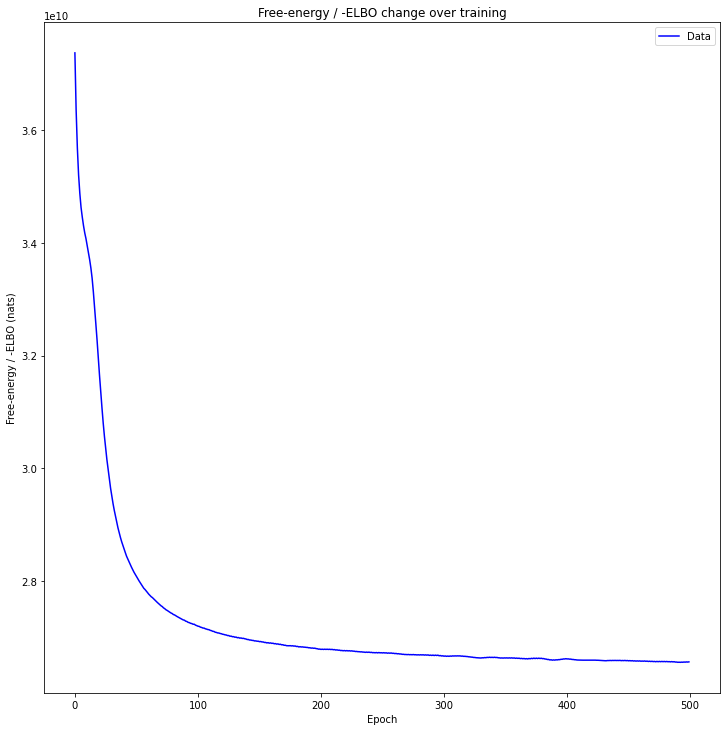

In [14]:
utils.plot_losses(losses)

In [15]:
len(dtfa.subjects())

6

In [16]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


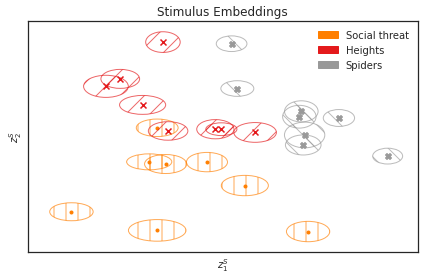

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [18]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


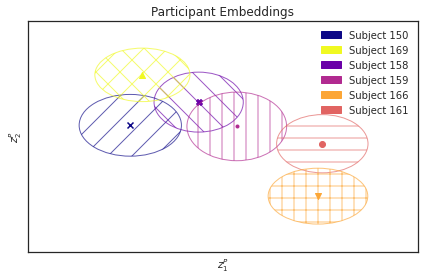

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [20]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/20/2021 12:42:59 Plotting factors for Participant 166, run 1


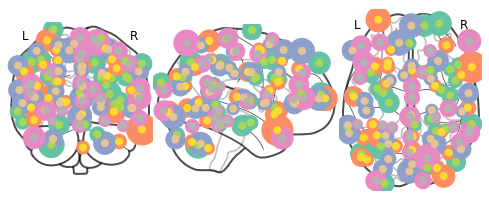

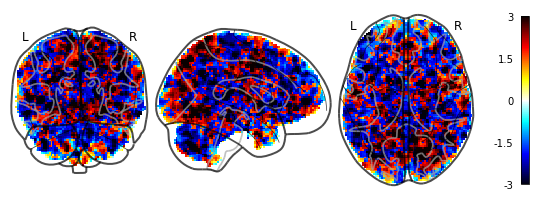

10/20/2021 12:43:08 Reconstruction Error (Frobenius Norm): 5.12134949e+02 out of 4.37333679e+02


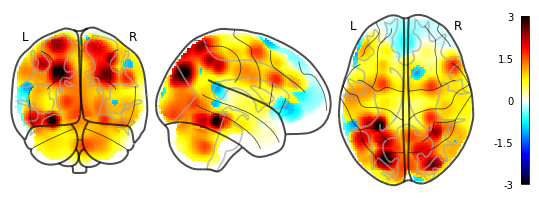

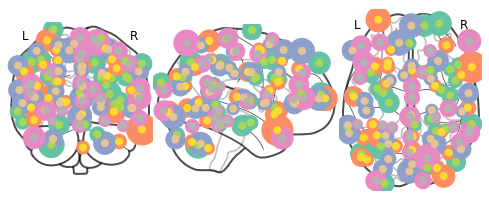

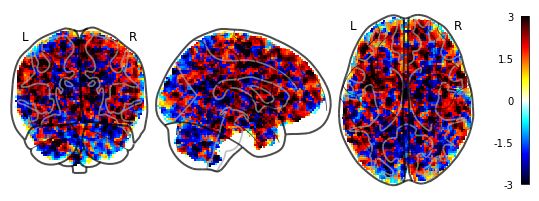

10/20/2021 12:43:18 Reconstruction Error (Frobenius Norm): 4.63622131e+02 out of 4.22695587e+02


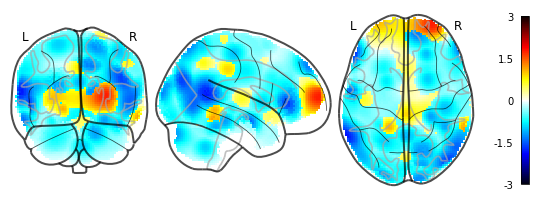

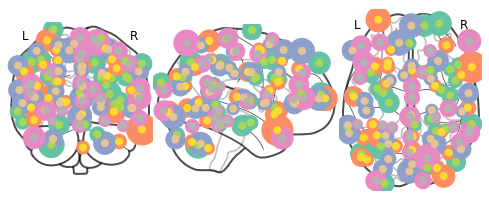

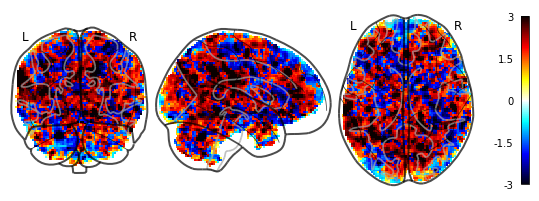

10/20/2021 12:43:28 Reconstruction Error (Frobenius Norm): 4.33220886e+02 out of 4.22085144e+02


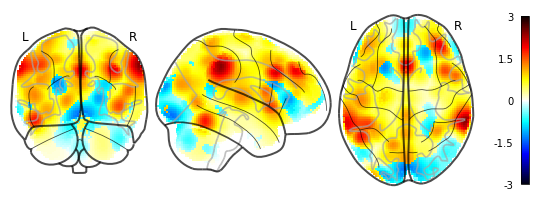

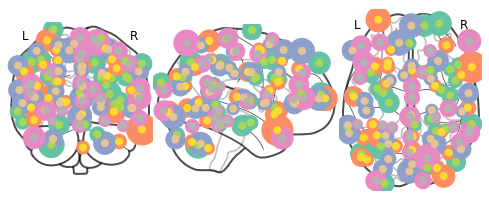

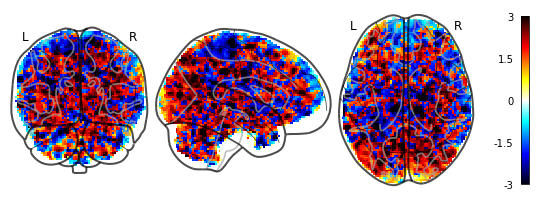

10/20/2021 12:43:41 Reconstruction Error (Frobenius Norm): 4.30999695e+02 out of 4.00315979e+02


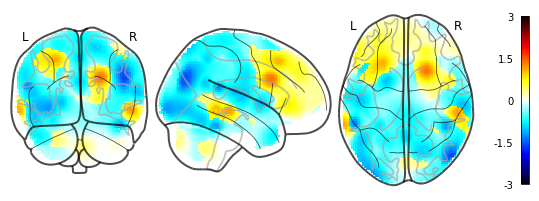

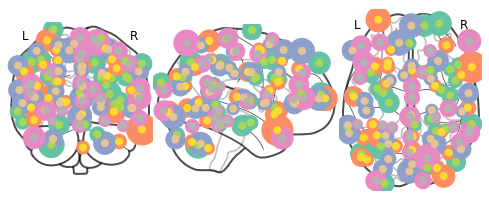

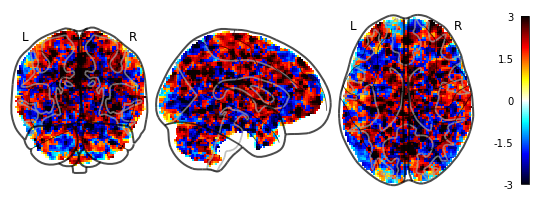

10/20/2021 12:43:53 Reconstruction Error (Frobenius Norm): 4.50508972e+02 out of 4.22615753e+02


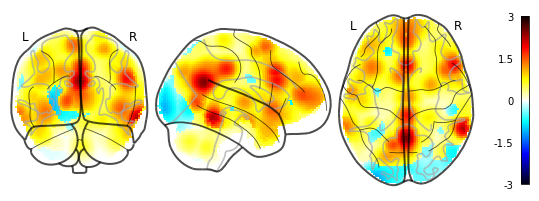

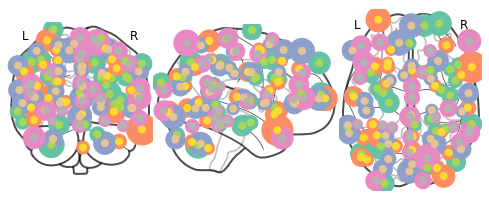

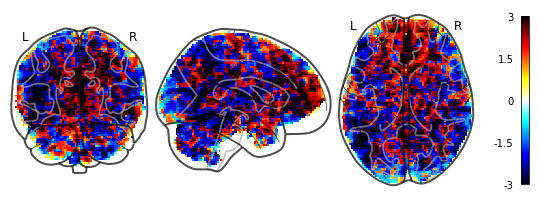

10/20/2021 12:44:06 Reconstruction Error (Frobenius Norm): 4.66697510e+02 out of 4.48799133e+02


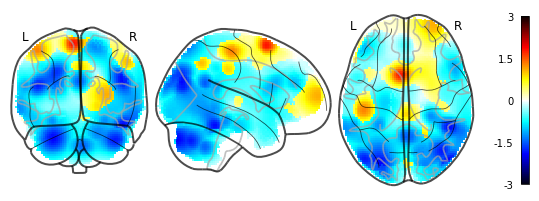

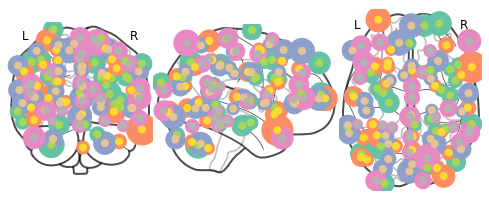

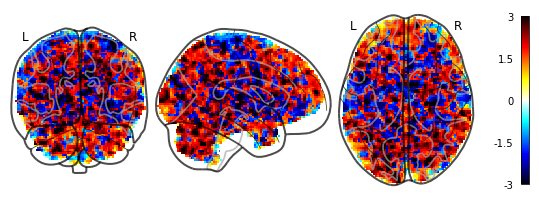

10/20/2021 12:44:20 Reconstruction Error (Frobenius Norm): 4.79021698e+02 out of 3.97955963e+02


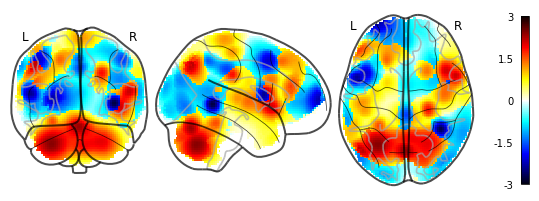

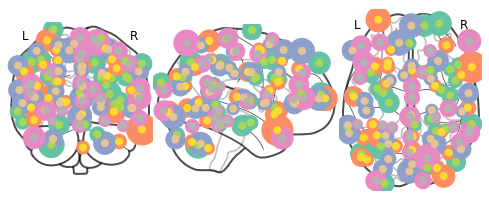

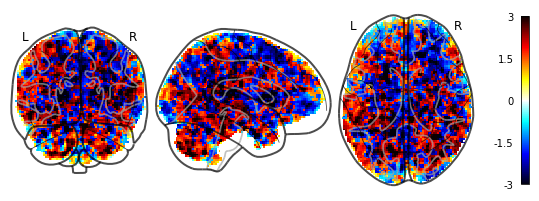

10/20/2021 12:44:37 Reconstruction Error (Frobenius Norm): 4.64765167e+02 out of 4.01981628e+02


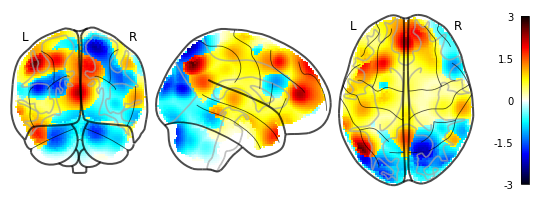

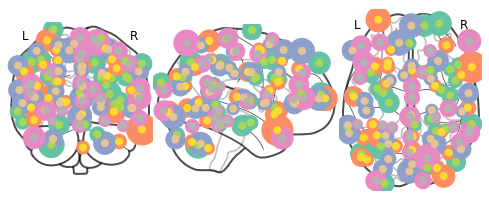

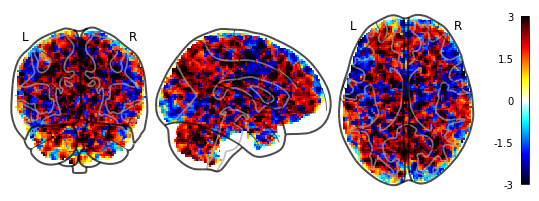

10/20/2021 12:44:52 Reconstruction Error (Frobenius Norm): 4.47051514e+02 out of 4.30525665e+02


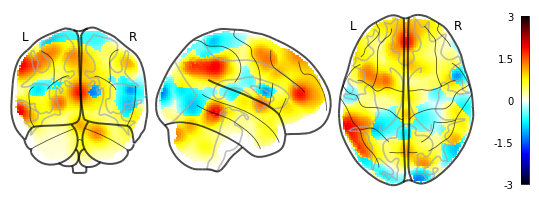

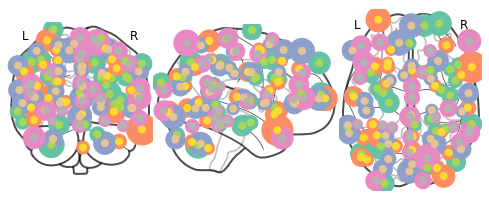

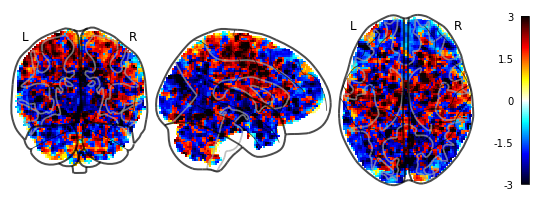

10/20/2021 12:45:08 Reconstruction Error (Frobenius Norm): 4.43320160e+02 out of 4.14106384e+02


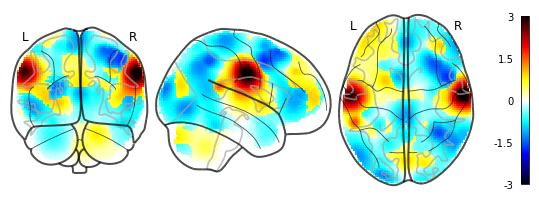

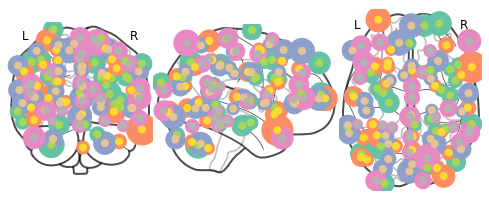

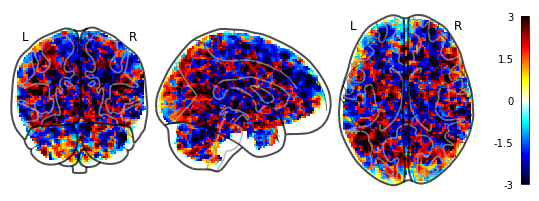

10/20/2021 12:45:26 Reconstruction Error (Frobenius Norm): 4.76710510e+02 out of 4.10976227e+02


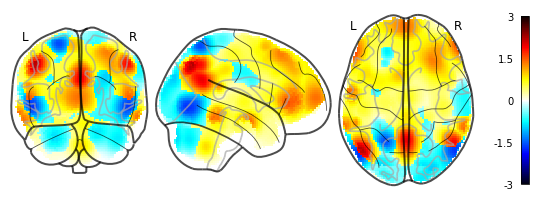

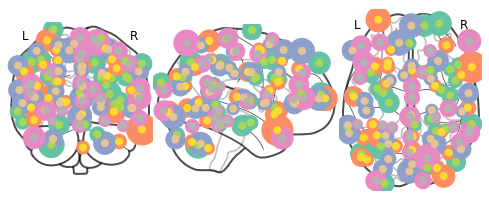

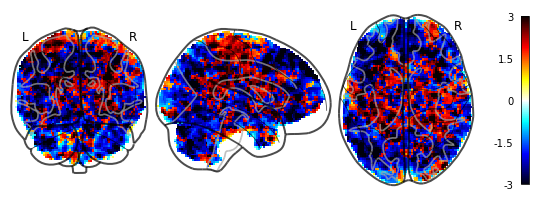

10/20/2021 12:45:44 Reconstruction Error (Frobenius Norm): 4.63675629e+02 out of 4.45168182e+02


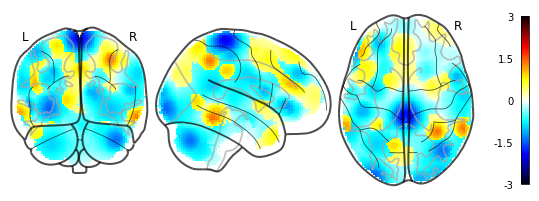

In [21]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

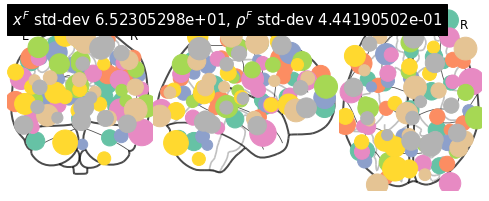

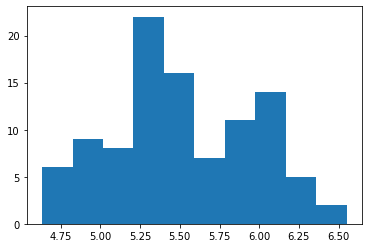

(<nilearn.plotting.displays.OrthoProjector at 0x7f189f57b8b0>,
 tensor([[  28.7213,  -47.9035,   22.2493],
         [  25.2395,   29.3054,    9.2563],
         [ -44.4256,    5.8337,   -0.7054],
         [ -46.9171,  -69.5876,  -37.2587],
         [ -26.4410,    1.0445,   65.2654],
         [ -52.3968,  -69.7011,   46.9617],
         [  35.9249,   22.4167,    1.4823],
         [  31.0239,  -85.3726,  -33.9815],
         [  43.0719,    1.8868,    5.9387],
         [   1.4101,   35.0945,   28.5016],
         [  22.6699,   -7.0012,   29.1786],
         [  40.1997,   67.8874,   -1.2339],
         [   0.2316,  -26.2658,  -13.7149],
         [ -24.8549,  -97.8257,   15.1701],
         [ -25.0251,  -24.9341,   31.7578],
         [  28.7156,  -33.6449,   70.0644],
         [  42.0380,  -47.6234,   -2.9960],
         [ -68.0000,  -41.8014,    4.2167],
         [ -33.6564,   -0.7674,  -11.3338],
         [  56.1222,  -40.5511,   50.3543],
         [  39.0670,  -83.2925,   29.1848],
         [ -5

In [22]:
dtfa.visualize_factor_embedding()

In [23]:
self = dtfa
hyperparams = self.variational.hyperparams.state_vardict()
tasks = self.tasks()
subjects = self.subjects()
z_p_mu = hyperparams['subject_weight']['mu'].data
z_s_mu = hyperparams['task']['mu'].data
interactions = OrderedSet(list(itertools.product(subjects, tasks)))
z_ps_mu = np.zeros(shape=(len(interactions),2))
count = 0
for p in range (len(subjects)):
    for t in range(len(tasks)):
        joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
        interaction_embed = self.decoder.interaction_embedding(joint_embed)# + \
#         self.decoder.interaction_embedding_skip(joint_embed)
        z_ps_mu[count,:] = interaction_embed.data.numpy()
#             interaction_embed = self.decoder.interaction_embedding(
#                 joint_embed).data
#             z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
#                                                                                  joint_embed),dim=-1)).data.numpy()
        count += 1
embedding_name = 'z^{PS}'

In [24]:
z_ps_mu

array([[-3.78548279e-02, -4.71646115e-02],
       [-4.01137210e-02, -4.98657376e-02],
       [-2.15094518e-02,  5.94156086e-02],
       [-1.49715189e-02,  1.32211611e-01],
       [-2.54827440e-02,  1.23633146e-02],
       [-3.18597630e-02, -1.02182319e-02],
       [-4.03563417e-02, -2.97702514e-02],
       [-3.77984866e-02, -2.14081090e-02],
       [-2.52842773e-02,  4.97992337e-03],
       [-4.55300659e-02, -4.26578857e-02],
       [-2.21663173e-02,  5.52932099e-02],
       [-2.76355017e-02, -1.30255735e-02],
       [-1.91735700e-02,  9.02733356e-02],
       [-2.01372653e-02,  6.51229620e-02],
       [-2.20938977e-02,  5.72099425e-02],
       [-3.27099822e-02, -1.20019028e-02],
       [-1.25768203e-02, -2.76729260e-02],
       [-3.93169597e-02, -2.57714614e-02],
       [-3.89384441e-02, -3.72083150e-02],
       [-3.14878523e-02, -9.12156235e-03],
       [-4.07255329e-02, -2.70664375e-02],
       [-3.05587742e-02, -8.00375082e-03],
       [-1.94994975e-02, -4.60193418e-02],
       [-2.

In [25]:
import pickle
filename = PREFIX +  '.dat'
tensors = {
    'z': {'mu': z_ps_mu},
    'labels': list(interactions),
}
filename = open(filename,'wb')
pickle.dump(tensors, filename)
filename.close()

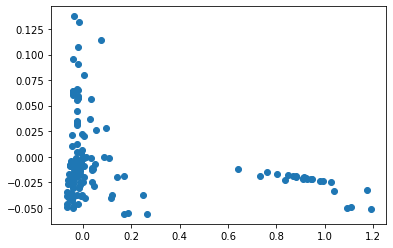

In [26]:
import matplotlib.pyplot as plt
plt.scatter(z_ps_mu[:,0], z_ps_mu[:,1])